In [1]:
import tensorflow as tf
import edward as ed

from edward.models import Bernoulli, Normal, Uniform

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
A = Normal(loc=tf.zeros(1), scale=tf.ones(1))
B = Normal(loc=tf.zeros(1), scale=tf.ones(1))
C = Normal(loc=tf.zeros(1), scale=tf.ones(1))

D = Bernoulli(logits=tf.cast(tf.add(A, B), tf.float32))
F = Bernoulli(logits=tf.cast(tf.multiply(B, C), tf.float32))

G = Bernoulli(logits=tf.cast(tf.multiply(D, F), tf.float32))

Est = Normal(loc=tf.cast(G, tf.float32), scale=tf.ones(1))

In [3]:
x = tf.placeholder(tf.float32)

In [4]:
qA = Normal(loc=tf.Variable(tf.zeros(1)),
           scale=tf.Variable(tf.nn.softplus(tf.ones(1))))

qB = Normal(loc=tf.Variable(tf.zeros(1)),
           scale=tf.Variable(tf.nn.softplus(tf.ones(1))))

qC = Normal(loc=tf.Variable(tf.zeros(1)),
           scale=tf.Variable(tf.nn.softplus(tf.ones(1))))

qD = Bernoulli(logits=tf.Variable(tf.random_normal([1])))
qF = Bernoulli(logits=tf.Variable(tf.random_normal([1])))

qG = Bernoulli(logits=tf.Variable(tf.random_normal([1])))

qEst = Normal(loc=tf.Variable(tf.zeros(1)),
           scale=tf.Variable(tf.nn.softplus(tf.ones(1))))

In [5]:
latent_vars = {A: qA, B: qB, C: qC, D: qD, F: qF, G: qG, Est: qEst}

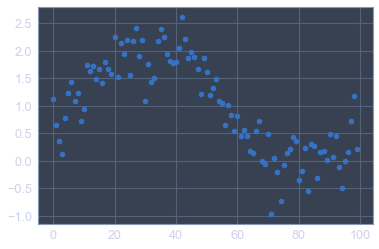

In [16]:
x_t = np.linspace(0, 10, 100)
data = np.sin(0.6*x_t - 0.3) + 1 + 0.4*np.random.randn(100)
plt.plot(data,'o')

In [17]:
inference = ed.KLqp(latent_vars, data={x: data})

In [43]:
inference.run(n_samples=5, n_iter=800)

800/800 [100%] ██████████████████████████████ Elapsed: 16s | Loss: 1.049


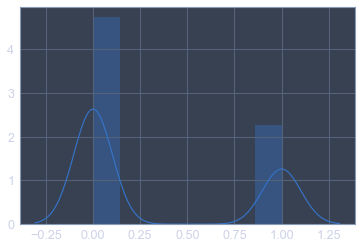

In [25]:
sns.distplot(qD.sample(2000).eval())

In [26]:
y_post = ed.copy(Est, latent_vars)

In [28]:
qd = qD.sample(200).eval()
qf = qF.sample(200).eval()
qg = qG.sample(200).eval()
qa = qA.sample(200).eval()
qb = qB.sample(200).eval()
qc = qC.sample(200).eval()

In [49]:
W = []
for ind in range(len(data)):
    aa = qEst.sample(10).eval(feed_dict={x: data[ind]})
    W.append(aa)

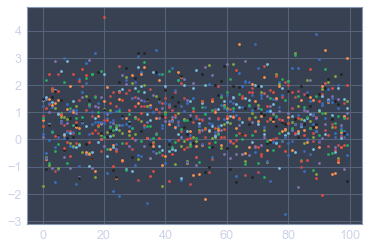

In [54]:
ww = np.asarray(W)
plt.plot(np.squeeze(ww),'.')

100

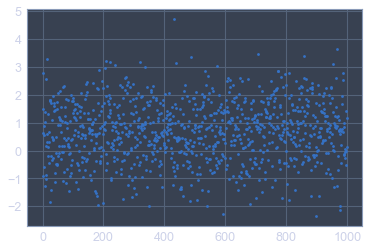

In [47]:
plt.plot(aa,'.')
len(data)

In [ ]:
D = Bernoulli(logits=tf.cast(tf.add(A, B), tf.float32))
F = Bernoulli(logits=tf.cast(tf.multiply(B, C), tf.float32))

G = Bernoulli(logits=tf.cast(tf.multiply(D, F), tf.float32))

Est = Normal(loc=tf.cast(G, tf.float32), scale=tf.ones(1))